--------- Steps ---------

1) Look at the big picture
2) Collect/Get the data
3) Look at the data, do some visualization and get some insights
4) Pick our machine learning models
5) Then train our machine learning models
6) Fine tune our machine learning models
7) Where we just see and present our model as a part of our application

-------- Dataset ---------

1) Training Data
2) Validation Data
3) Test Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# we don't need to .show() method to display by using this inline command
%matplotlib inline

In [7]:
from sklearn.datasets import fetch_california_housing, load_iris, load_boston 

In [14]:
# we have given this name called 'Sample' , when we worked with panda library...
housing = pd.read_csv('Sample')

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021272E1D358>,
      dtype=object)

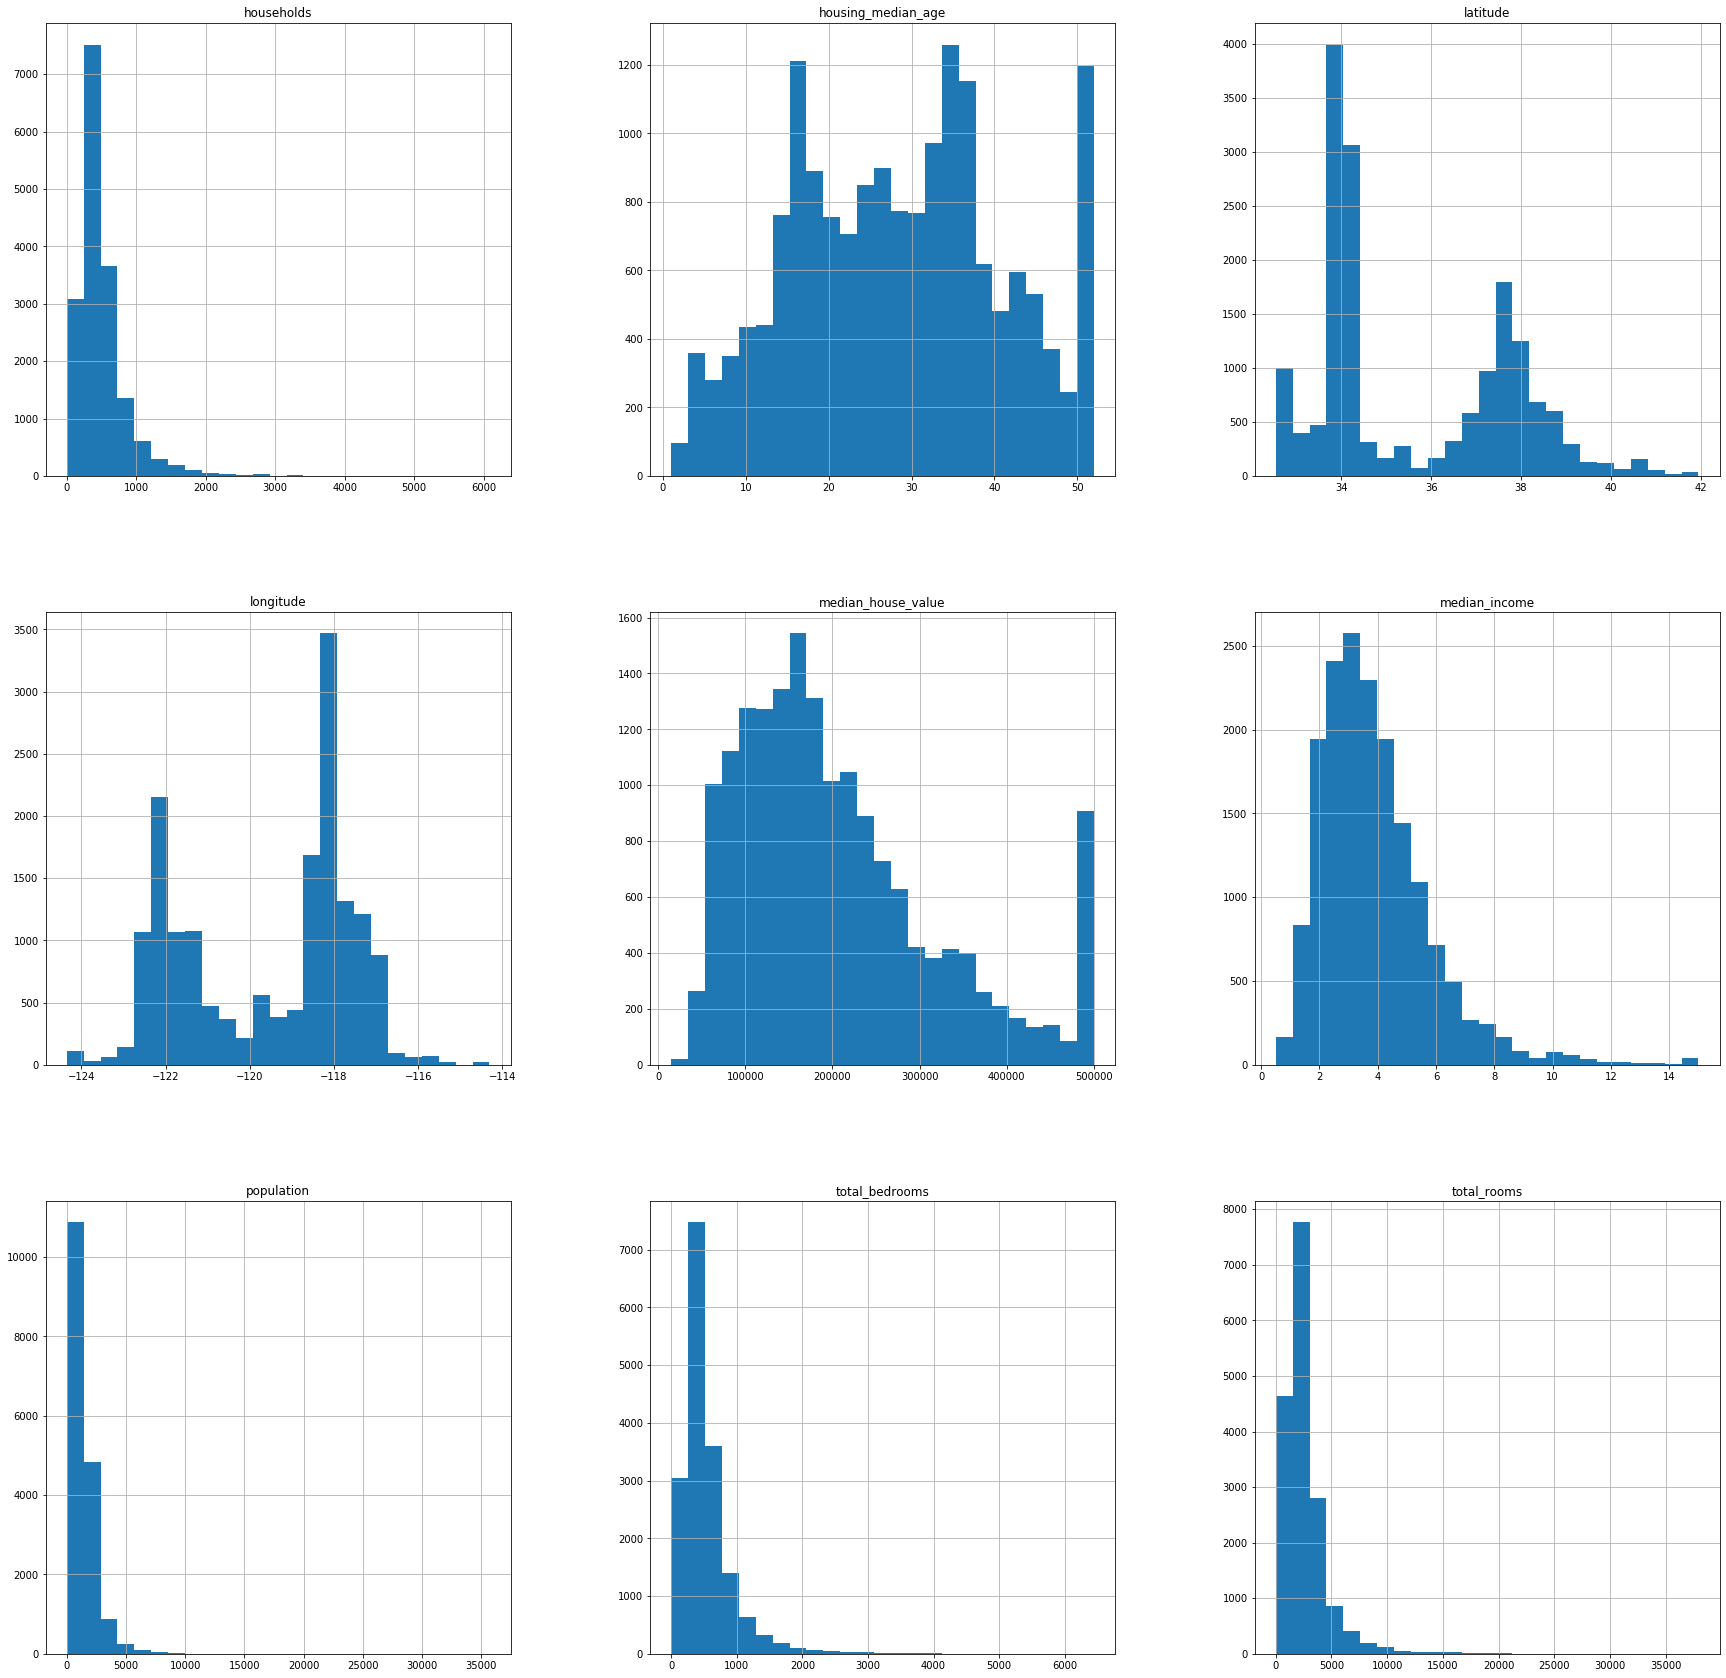

In [26]:
housing.hist(figsize=(30,30), bins = 25) 

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
train_set, test_set = train_test_split(housing, test_size=.2)

In [33]:
train_set.size

122400

In [36]:
test_set.size

30600

# Create a Continuous value to Category

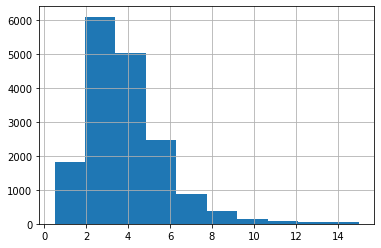

In [41]:
housing['median_income'].hist()

In [45]:
housing['median_income'].head()

0    1.4936
1    1.8200
2    1.6509
3    3.1917
4    1.9250
Name: median_income, dtype: float64

In [42]:
# removing the fraction
# np.ceil do (3.2 -> 4,  8.4 -> 9) 
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

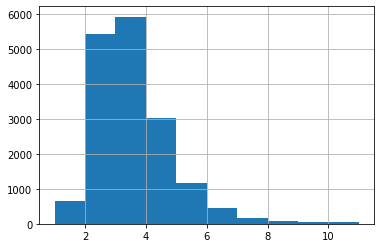

In [43]:
# we are doing that because we want to analize/ find out the category of
# income
housing['income_cat'].hist()

In [47]:
housing['income_cat'].value_counts()

3.0     5919
2.0     5413
4.0     3029
5.0     1180
1.0      664
6.0      453
7.0      159
8.0       89
9.0       45
11.0      38
10.0      11
Name: income_cat, dtype: int64

In [48]:
# if housing['income_cat'] > 5 , then replace (inplace = True) them by 5.0
# if housing['income_cat'] < 5 , nothing to do 
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

In [52]:
housing['income_cat'].value_counts()

3.0    5919
2.0    5413
4.0    3029
5.0    1975
1.0     664
Name: income_cat, dtype: int64

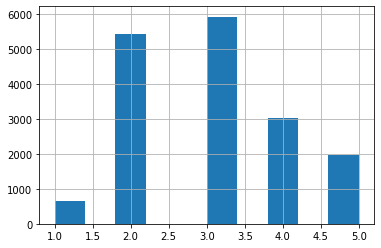

In [59]:
housing['income_cat'].hist()

split training_set and testing_set

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

In [55]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [58]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

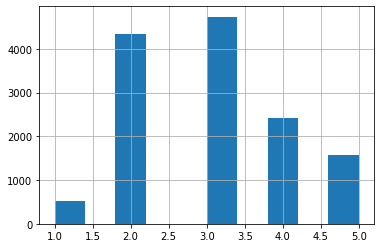

In [57]:
s_train_set['income_cat'].hist()

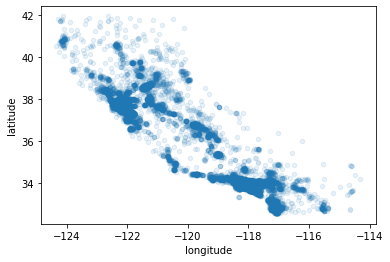

In [64]:
housing = s_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

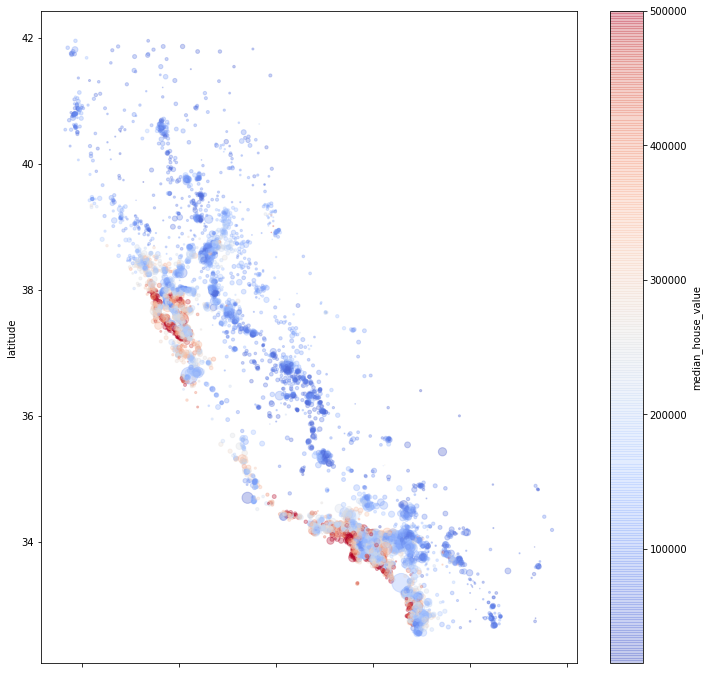

In [75]:
# The more median_house_value, the more people live there
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
             s=housing['population']/100, c='median_house_value', 
             figsize=(12,12), cmap=plt.get_cmap('coolwarm'), colorbar=True)

In [76]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.925501,-0.118424,0.046629,0.073191,0.102144,0.061928,-0.018498,-0.049710,-0.013646
latitude,-0.925501,1.000000,0.021543,-0.039174,-0.071279,-0.111659,-0.077811,-0.079144,-0.140582,-0.084930
housing_median_age,-0.118424,0.021543,1.000000,-0.363275,-0.324687,-0.299374,-0.307815,-0.114348,0.112938,-0.141735
total_rooms,0.046629,-0.039174,-0.363275,1.000000,0.928628,0.861705,0.920356,0.194219,0.127608,0.214615
total_bedrooms,0.073191,-0.071279,-0.324687,0.928628,1.000000,0.881682,0.981982,-0.012317,0.045312,0.008944
population,0.102144,-0.111659,-0.299374,0.861705,0.881682,1.000000,0.908127,0.000117,-0.028486,0.019243
households,0.061928,-0.077811,-0.307815,0.920356,0.981982,0.908127,1.000000,0.009098,0.060024,0.032417
median_income,-0.018498,-0.079144,-0.114348,0.194219,-0.012317,0.000117,0.009098,1.000000,0.688242,0.904468
median_house_value,-0.049710,-0.140582,0.112938,0.127608,0.045312,-0.028486,0.060024,0.688242,1.000000,0.646750
income_cat,-0.013646,-0.084930,-0.141735,0.214615,0.008944,0.019243,0.032417,0.904468,0.646750,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002127A9A6E80>,
      dtype=object)

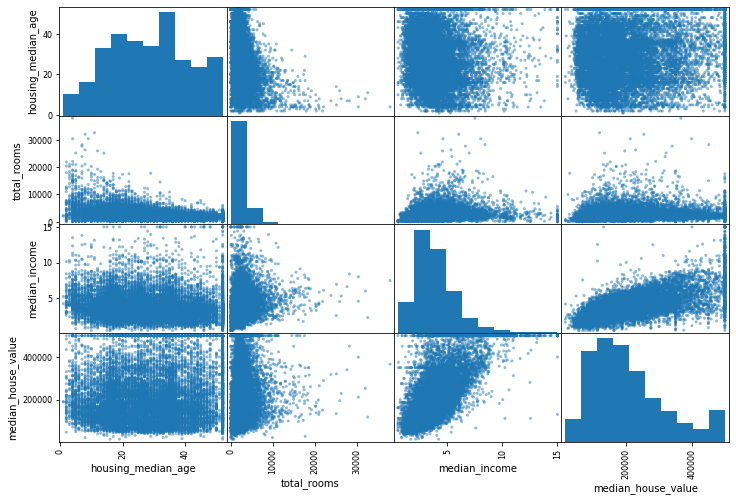

In [80]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']], figsize=(12,8))

Drop the 'median_house_vale'. Because it's the column that we have to predict.

In [84]:
housing = s_train_set.copy()
housing.drop('median_house_value', axis=1, inplace=True)

In [85]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
408,-116.95,33.74,20.0,2233.0,431.0,1024.0,399.0,2.4554,2.0
14868,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,3.0
9976,-119.76,36.68,29.0,1243.0,312.0,836.0,277.0,1.8355,2.0
1581,-117.22,32.83,17.0,1124.0,187.0,553.0,205.0,5.7451,4.0
16393,-122.54,37.88,30.0,4382.0,732.0,1775.0,745.0,6.7809,5.0


In [86]:
# our prediction column!!!
housing_labels = s_train_set['median_house_value'].copy()

In [88]:
housing_labels.tail()

408       89400.0
14868    109500.0
9976      74200.0
1581     237300.0
16393    414400.0
Name: median_house_value, dtype: float64

In [109]:
# axis=1 == column, axis=0 == row
# drop null rows
incomplete_rows = housing[housing.isnull().any(axis=1)]
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


In [110]:
# another way of dropping null values
incomplete_rows.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


In [111]:
# another way of dropping null values
incomplete_rows.dropna(subset=['total_bedrooms'])
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


preprocessing data

In [117]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') # filled null values by median values
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
408,-116.95,33.74,20.0,2233.0,431.0,1024.0,399.0,2.4554,2.0
14868,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,3.0
9976,-119.76,36.68,29.0,1243.0,312.0,836.0,277.0,1.8355,2.0
1581,-117.22,32.83,17.0,1124.0,187.0,553.0,205.0,5.7451,4.0
16393,-122.54,37.88,30.0,4382.0,732.0,1775.0,745.0,6.7809,5.0


 if data set have some categorical values drop these categorical columns and apply 'median' values instead of null values into rest of the numarical columns

 ex:
 numarical_housing = housing.drop('ocean_proximity', axis=1)

In [118]:
# null values are filled in housing data set
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [119]:
imputer.statistics_

array([-118.49,   34.25,   29.  , 2126.  ,  433.  , 1163.  ,  408.  ,
          3.54,    3.  ])

In [120]:
# housing data set's median value and imputer median values are same ... look!
housing.median().values

array([-118.49,   34.25,   29.  , 2126.  ,  433.  , 1163.  ,  408.  ,
          3.54,    3.  ])

In [121]:
X = imputer.transform(housing)

In [123]:
transformed_housing = pd.DataFrame(X, columns=housing.columns, index=list(housing.index.values))